In [126]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

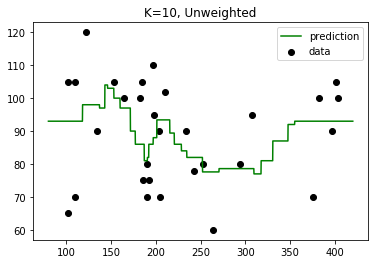

In [127]:
#add in duration to try to get a better model to predict BPM
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X,Y)

T = np.arange(80,420,0.09)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X,Y,c='k',label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [128]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Unweighted Accuracy: -0.70 (+/- 1.02)


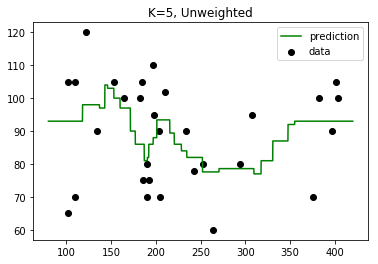

In [129]:
#add in duration to try to get a better model to predict BPM
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X,Y)

T = np.arange(80,420,0.09)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X,Y,c='k',label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=5, Unweighted')
plt.show()

In [130]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.70 (+/- 1.02)


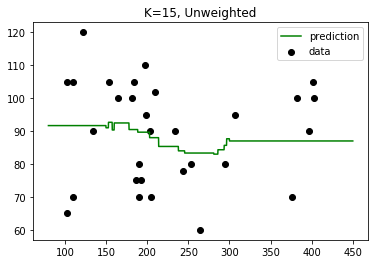

In [131]:
#add in duration to try to get a better model to predict BPM
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=15)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X,Y)

T = np.arange(80,450,0.2)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X,Y,c='k',label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=15, Unweighted')
plt.show()

In [132]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.39 (+/- 0.64)


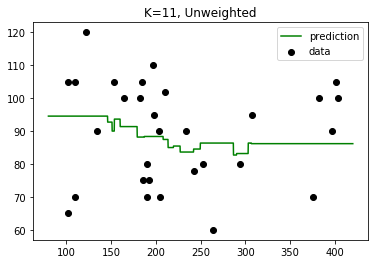

In [133]:
#add in duration to try to get a better model to predict BPM
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=11)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X,Y)

T = np.arange(80,420,0.1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X,Y,c='k',label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=11, Unweighted')
plt.show()

In [134]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.40 (+/- 0.73)


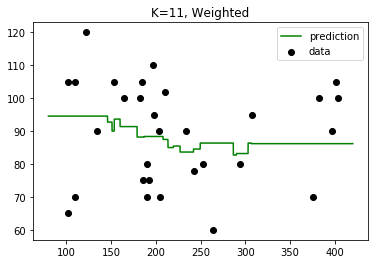

In [135]:
#add in duration to try to get a better model to predict BPM
from sklearn import neighbors

knn_w = neighbors.KNeighborsRegressor(n_neighbors=11, weights='distance')
X = pd.DataFrame(music.duration)
Y = music.bpm
knn_w.fit(X,Y)

T = np.arange(80,420,.001)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X,Y,c='k',label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=11, Weighted')
plt.show()

In [136]:
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted Accuracy: -0.78 (+/- 0.77)


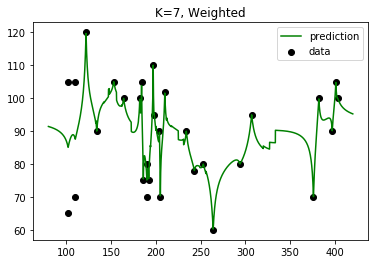

In [137]:
#add in duration to try to get a better model to predict BPM
from sklearn import neighbors

knn_w = neighbors.KNeighborsRegressor(n_neighbors=7, weights='distance')
X = pd.DataFrame(music.duration)
Y = music.bpm
knn_w.fit(X,Y)

T = np.arange(80,420,0.09)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X,Y,c='k',label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=7, Weighted')
plt.show()

In [138]:
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted Accuracy: -0.89 (+/- 0.90)


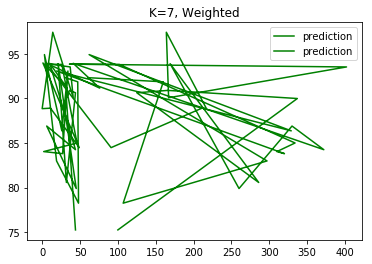

In [139]:
#use both features

#add in duration to try to get a better model to predict BPM
from sklearn import neighbors

knn_w = neighbors.KNeighborsRegressor(n_neighbors=7, weights='distance')
X = pd.DataFrame(music[['loudness','duration']])
Y = music.bpm
knn_w.fit(X,Y)
xp = np.random.randint(50, size=30)
yp = np.random.randint(420, size=30)
T = pd.DataFrame()
T['x']=xp
T['y']=yp
T = T[['x','y']]
Y_ = knn_w.predict(T)

#plt.scatter(yp,xp,c='k',label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=7, Weighted')
plt.show()


In [140]:
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted Accuracy: -0.30 (+/- 0.79)


In [141]:
from sklearn import neighbors

knn_w = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
X = pd.DataFrame(music[['loudness','duration']])
Y = music.bpm
knn_w.fit(X,Y)

score_w = cross_val_score(knn_w,X,Y,cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


Weighted Accuracy: -0.23 (+/- 0.60)


In [142]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=4, weights='distance')
X = np.array(music.iloc[:, 0:2]) 
Y = music.bpm
knn_w.fit(X, Y)
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy  %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))



Weighted Accuracy  -0.63 (+/- 1.64)


In [143]:
for i in range(0,24):
    knn_w = neighbors.KNeighborsRegressor(n_neighbors=i+1, weights='distance')
    X = np.array(music.iloc[:, 0:2]) 
    Y = music.bpm
    knn_w.fit(X, Y)
    score_w = cross_val_score(knn_w, X, Y, cv=5)
    print('k={}'.format(i+1))
    print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


k=1
Weighted Accuracy: -1.54 (+/- 4.67)
k=2
Weighted Accuracy: -0.61 (+/- 2.20)
k=3
Weighted Accuracy: -0.59 (+/- 1.75)
k=4
Weighted Accuracy: -0.63 (+/- 1.64)
k=5
Weighted Accuracy: -0.51 (+/- 1.24)
k=6
Weighted Accuracy: -0.37 (+/- 0.88)
k=7
Weighted Accuracy: -0.30 (+/- 0.79)
k=8
Weighted Accuracy: -0.30 (+/- 0.80)
k=9
Weighted Accuracy: -0.27 (+/- 0.69)
k=10
Weighted Accuracy: -0.26 (+/- 0.74)
k=11
Weighted Accuracy: -0.26 (+/- 0.75)
k=12
Weighted Accuracy: -0.25 (+/- 0.66)
k=13
Weighted Accuracy: -0.25 (+/- 0.67)
k=14
Weighted Accuracy: -0.23 (+/- 0.67)
k=15
Weighted Accuracy: -0.23 (+/- 0.61)
k=16
Weighted Accuracy: -0.23 (+/- 0.60)
k=17
Weighted Accuracy: -0.22 (+/- 0.57)
k=18
Weighted Accuracy: -0.23 (+/- 0.60)
k=19
Weighted Accuracy: -0.23 (+/- 0.60)
k=20
Weighted Accuracy: -0.23 (+/- 0.60)
k=21
Weighted Accuracy: -0.23 (+/- 0.62)
k=22
Weighted Accuracy: -0.23 (+/- 0.60)
k=23
Weighted Accuracy: -0.23 (+/- 0.60)
k=24
Weighted Accuracy: -0.22 (+/- 0.59)


In [144]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance', algorithm='ball_tree')
X = np.array(music.iloc[:, 0:2]) 
Y = music.bpm
knn_w.fit(X, Y)
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


Weighted Accuracy: -0.23 (+/- 0.61)


In [145]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=15,weights='uniform',algorithm='ball_tree')
X = np.array(music.iloc[:, 0:2]) 
Y = music.bpm
knn_w.fit(X, Y)
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


Weighted Accuracy: -0.38 (+/- 0.65)


In [146]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance', algorithm='kd_tree')
X = np.array(music.iloc[:, 0:2]) 
Y = music.bpm
knn_w.fit(X, Y)
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


Weighted Accuracy: -0.23 (+/- 0.61)


In [147]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance', algorithm='brute')
X = np.array(music.iloc[:, 0:2]) 
Y = music.bpm
knn_w.fit(X, Y)
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


Weighted Accuracy: -0.23 (+/- 0.61)
